# Project 1 - Notebook

In [762]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': False,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 12}
from matplotlib import cm
plt.rcParams.update(newparams)

# Problem 1

In [763]:
def im(grid, title = '', origin = 'lower'):
    plt.imshow(grid, origin=origin)
    plt.colorbar()
    plt.title(title)
    plt.show()

In [764]:
def dirichlet(boundaries, alpha = 1, beta = 1):
    """ Create a one-dimensional vector for Dirichlet conditions. Uses natural ordering.

    Args:
        G (array(4 x M-1)): Matrix with row vectors corresponding respectively to boundary at x = x0, y = y0, x = xend, y = yend
        alpha, beta (floats): Constants as defined in text. Optional arguments. 

    Returns:
        g (array(M-1)^2): One dimensional array meant for use in linear system, using natural ordering
    """
    l, t, r, b = boundaries
    M = t.shape[0] - 1
    N = l.shape[0] - 1         # l is N+1 
    G = np.zeros((N-1, M-1))
    G[0, 1:] += -beta * b[1:M-1]
    G[-1, :-1] += -beta * t[2: M]
    G[:, 0] += -alpha * l[1:N] - beta * l[0:N-1]
    G[:, -1] += -alpha * r[1:N] - beta * r[2:N+1]
    return G.flatten()


# Testing
M = 4
N = 4
l = np.arange(N+1)
t = np.arange(M+1)
r = np.arange(N+1)
b = np.arange(M+1)

g = dirichlet([l, t, r, b], 1, 2)
print(np.flip(g.reshape((N-1,M-1)), 0))

[[-11.  -6. -11.]
 [ -4.   0.  -8.]
 [ -1.  -2.  -9.]]


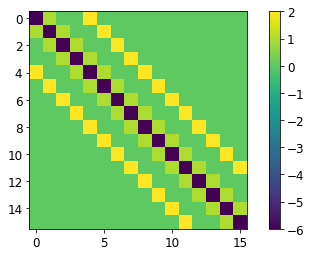

In [765]:
def ndiag(consts, offsets, N):
    """Generate a matrix with arbitrary number of constant diagonals, 0 elsewhere

    Args:
        consts (list of floats):    list containing floats on diagonal
        offsets (list of ints):     list of offsets. Corresponds to the consts list
        N (int):                    length of array

    Returns:
        A (N x N matrix):           matrix with diagonals as specified
    """
    diags = []
    for i in range(len(consts)):
        diags.append(consts[i] * np.ones(N - np.abs(offsets[i])))

    A = np.zeros((N,N))
    for i in range(len(diags)):
        A += np.diag(diags[i], offsets[i])
    return A

# Testing
M = 5
alpha, beta = 1, 2
consts = [beta, alpha, -2*(alpha + beta), alpha, beta]
offsets = [-(M-1), -1, 0, 1, M-1]
A = ndiag(consts, offsets, (M-1)**2)
im(A, origin = 'upper')

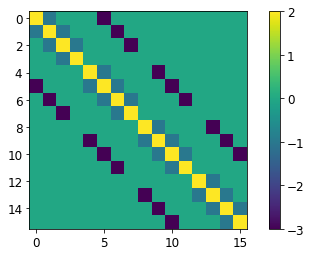

In [766]:
def triblock(C, B, D, M):
    A = np.kron(np.eye(M-1), C)
    A += np.kron(ndiag([1], [1], M-1), B)
    A += np.kron(ndiag([1], [-1], M-1), D)
    return A

# Testing
M = 5
C = ndiag([-1,2,-1], [-1,0,1], (M-1))
B = 3 * ndiag([-1], [1], M-1)
D = 3 * ndiag([-1], [-1], M-1)
A = triblock(C, B,D, M)
im(A, origin='upper')

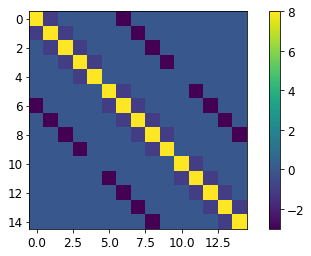

In [767]:
def matrixmaker(alpha, beta, M, N=M):
    C = ndiag([-alpha, 2*(alpha + beta), -alpha], [-1,0,1], M-1)
    B = ndiag([-beta], [1], M-1)
    D = ndiag([-beta], [-1], M-1)
    A = triblock(C,B,D,N)
    return A

# Testing
M = 6
N = 4
A = matrixmaker(1, 3, M, N)
im(A, origin='upper')

## 1a)

In [768]:
def solver(f, boundaries, a, M):
    h = 1/M
 
    A = matrixmaker(a, 1, M, M)
    g = dirichlet(boundaries, a, 1)
    U_vec = np.linalg.solve(A, -g + h**2 * f)
    U = U_vec.reshape((M-1, M-1))
    return U

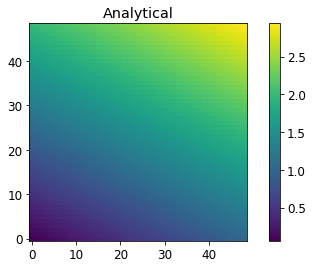

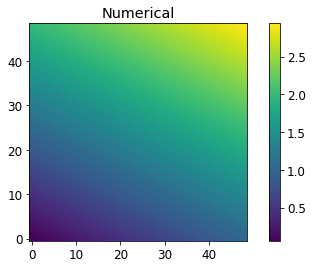

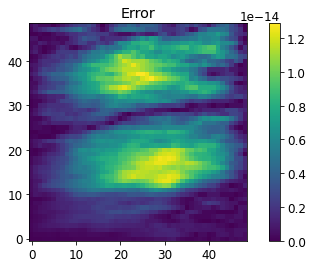

In [769]:
M = 50
h = 1/M
k = 2*h
r = 2
a = 10
x = np.linspace(0, 1, M+1)
y = np.linspace(0, 2, M+1)

def u_exact(x, y):
    return x + y

def f(x, y):
    return x*y*0
xx, yy = np.meshgrid(x, y)

fmat = f(xx, yy)[1:-1, 1:-1]
fvec = fmat.flatten()

U_exact = u_exact(xx, yy)
b = U_exact[0, :]
t = U_exact[-1, :]
l = U_exact[:, 0]
r = U_exact[:, -1]
boundaries = [l,t,r,b]

U = solver(fvec, boundaries, a, M)

im(U_exact[1:-1,1:-1], 'Analytical')

im(U.reshape((M-1,M-1)), 'Numerical')

im(np.abs(U.reshape((M-1, M-1)) - U_exact[1:-1,1:-1]), 'Error')


## 1c)

### Exploring the function

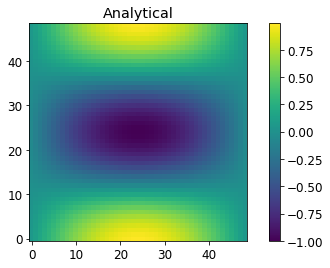

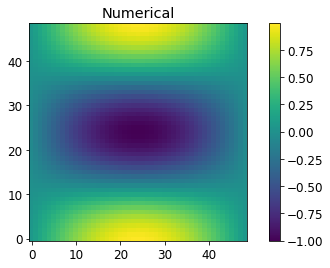

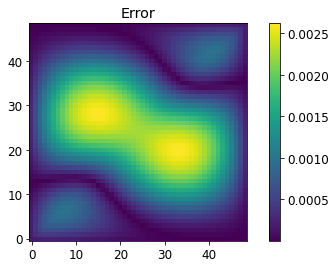

In [770]:
M = 50
h = 1/M
r = 2
a = 0.1
x = np.linspace(0, 1, M+1)
y = np.linspace(0, 2, M+1)

def u_exact(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

def f(x, y):
    return np.pi**2 * ((a+1+r**2) * np.sin(np.pi * x) * np.cos(np.pi * y) + 2*r * np.cos(np.pi * x) * np.sin(np.pi * y))

xx, yy = np.meshgrid(x, y)
fmat = f(xx, yy)[1:-1, 1:-1]
fvec = fmat.flatten()

U_exact = u_exact(xx, yy)
b = U_exact[0, :]
t = U_exact[-1, :]
l = U_exact[:, 0]
r = U_exact[:, -1]
boundaries = [l,t,r,b]

U = solver(fvec, boundaries, a, M)

im(U_exact[1:-1,1:-1], 'Analytical')

im(U.reshape((M-1,M-1)), 'Numerical')

im(np.abs(U.reshape((M-1, M-1)) - U_exact[1:-1,1:-1]), 'Error')

### Convergence plot

M array:  [16 32 64]


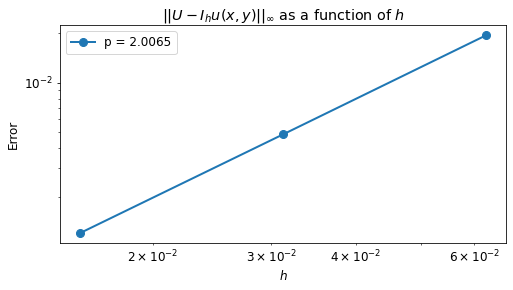

In [771]:
num_points = 3
Ms = 2**np.arange(4, 4+num_points) 
print("M array: ", Ms)
hs = 1 / Ms
r = 2
a = 2

def u_exact(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

def f(x, y):
    return np.pi**2 * ((a+1+r**2) * np.sin(np.pi * x) * np.cos(np.pi * y) + 2*r * np.cos(np.pi * x) * np.sin(np.pi * y))

errors = np.zeros(num_points)

for i in range(num_points):
    x = np.linspace(0, 1, Ms[i]+1)
    y = np.linspace(0, 2, Ms[i]+1)
    xx, yy = np.meshgrid(x, y)

    f_matrix = f(xx, yy)[1:-1, 1:-1]
    f_vec = f_matrix.flatten()
    U_exact = u_exact(xx, yy)

    bottom = U_exact[0, :]
    top = U_exact[-1, :]
    left = U_exact[:, 0]
    right = U_exact[:, -1]
    boundaries = [left,top,right,bottom]
    
    U = solver(f_vec, boundaries, a, Ms[i])
    errors[i] = np.max(np.abs(U - U_exact[1:-1, 1:-1]))

order = np.polyfit(np.log(hs),np.log(errors), 1)[0]

plt.loglog(hs, errors, '-o', label = 'p = {:.4f}'.format(order))
plt.xlabel(r'$h$')
plt.ylabel('Error')
plt.title(r'$||U-I_hu(x,y)||_\infty$ as a function of $h$')
plt.legend()
plt.show()

## 1d)

In [772]:
def solver_phat(f, boundaries, a, M, N=M):
    h = 1/M

    A = matrixmaker(a, 1, M, N)
    
    g = dirichlet(boundaries, a, 1)
    U_vec = np.linalg.solve(A, -g + h**2 * f)
    U = U_vec.reshape((N-1, M-1))
    return U

M array:  [16 32 64]
N=  12
N=  24
N=  48


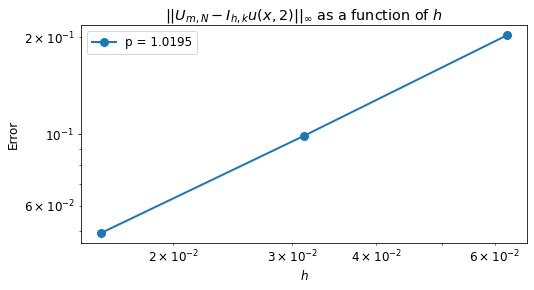

In [773]:
def u_exact(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

def f(x, y, r):
    return np.pi**2 * ((a+1+r**2) * np.sin(np.pi * x) * np.cos(np.pi * y) + 2*r * np.cos(np.pi * x) * np.sin(np.pi * y))

r = np.exp(1)

num_points = 3
Ms = 2**np.arange(4, 4+num_points) 
print("M array: ", Ms)
hs = 1 / Ms

errors = np.zeros(num_points)

for i in range(num_points):
    M = Ms[i]
    h = hs[i]
    k = h * r
    
    x = np.linspace(0, 1, M+1)
    y = np.arange(0, 2+k, k)

    N = len(y) - 1
    print("N= ", N)
    xx, yy = np.meshgrid(x, y)
    U_exact = u_exact(xx, yy)

    f_matrix = f(xx, yy, r)[1:-1, 1:-1]
    f_vec = f_matrix.flatten()
    U_exact = u_exact(xx, yy)

    bottom = U_exact[0, :]
    top = u_exact(x, 2)
    left = U_exact[:, 0]
    right = U_exact[:, -1]
    right[-1] = top[-1]
    boundaries = [left,top,right,bottom]

    U = solver_phat(f_vec, boundaries, a, M, N)
    errors[i] = np.max(np.abs(U[:,-1] - U_exact[1:-1,-1]))

order = np.polyfit(np.log(hs),np.log(errors), 1)[0]

plt.loglog(hs, errors, '-o', label = 'p = {:.4f}'.format(order))
plt.xlabel(r'$h$')
plt.ylabel('Error')
plt.title(r'$||U_{m,N}-I_{h,k}u(x,2)||_\infty$ as a function of $h$')
plt.legend()
plt.show()

# Problem 2, Changing the stencil

In [774]:
def normal_dirichlet(boundaries, alpha = 1, beta = 1):
    """ Create a one-dimensional vector for Dirichlet conditions. Uses natural ordering.

    Args:
        G (array(4 x M-1)): Matrix with row vectors corresponding respectively to boundary at x = x0, y = y0, x = xend, y = yend
        alpha, beta (floats): Constants as defined in text. Optional arguments. 

    Returns:
        g (array(M-1)^2): One dimensional array meant for use in linear system, using natural ordering
    """
    l, t, r, b = boundaries
    M = l.shape[0] - 1         # l is M+1
    G = np.zeros((M-1, M-1))
    G[0, :] -= beta * b[1:M]
    G[-1, :] -= beta * t[1:M]
    G[:, 0] -= alpha * l[1:M]
    G[:, -1] -= alpha * r[1:M]
    """plt.imshow(G)
    plt.show()"""
    return G.flatten()

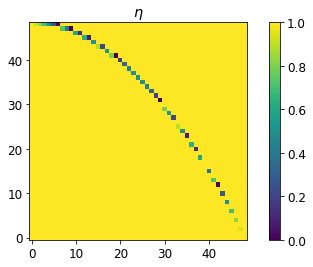

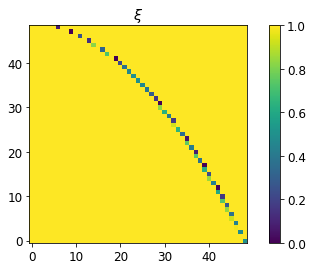

In [775]:
def get_etaxi(M):
    h = 1/(M+1)
    x = np.linspace(0, 1, M+1)
    y = np.linspace(0, 1, M+1)
    xx, yy = np.meshgrid(x, y)

    xigrid = (np.sqrt(1 - yy) - xx)/h
    xigrid[xigrid<0] = 1
    xigrid[xigrid>1] = 1

    etagrid = ((1-xx**2) - yy)/h
    etagrid[etagrid<0] = 1
    etagrid[etagrid>1] = 1
    return etagrid[1:-1,1:-1].flatten(), xigrid[1:-1,1:-1].flatten()

# Testing

M = 50
e, x = get_etaxi(M)
im(e.reshape((M-1,M-1)), r'$\eta$')
im(x.reshape((M-1,M-1)), r'$\xi$')

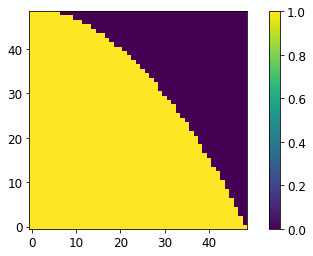

In [776]:
def bool_domain_gen(M):
    x = np.linspace(0, 1, M+1)
    y = np.linspace(0, 1, M+1)
    x_g, y_g = np.meshgrid(x, np.sqrt(1-y))
    #y_g = y_g[::-1]
    bool_domain = x_g < y_g
    return bool_domain[1:-1,1:-1]

# Testing
M = 50
bool_domain = bool_domain_gen(M)
im(bool_domain)

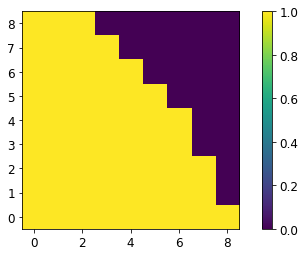

[9 8 8 7 7 6 5 4 3]


In [777]:
def bool2vec(bool_domain):
    domain_vec = np.zeros(len(bool_domain[0,:]))
    for i in range(len(domain_vec)):
        domain_vec[i] = np.sum(bool_domain[i])
    domain_vec = domain_vec.astype(int)
    return domain_vec

# Testing
M = 10
bool_domain = bool_domain_gen(M)
domain_vec = bool2vec(bool_domain)
im(bool_domain)
print(domain_vec)

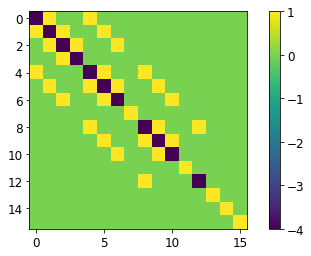

In [778]:
def triblock_mod(C, B, M, domain_vec):
    A = np.kron(np.eye(M-1), C)
    A += np.kron(ndiag([1,1], [-1, 1], M-1), B)
    if np.size(A) != (M - 1)**4:
        print("np.size(A) != (M - 1)**4")
        print(np.size(A))
        print((M - 1)**4)

    for i in range((M - 1)):
        A[(i*((M - 1))+domain_vec[i]):(i+1)*((M - 1)), :] = 0
    
    for i in range((M - 1)**2):
        if A[i,i] == 0:
            A[i,i] = 1
    for i in range((M - 1)**2):
        if A[i,i] != 1:
            if A[i+1,i+1] == 1:
                A[i,i+1] = 0
            if i < (M - 1)**2 - (M - 1):
                if A[i+(M - 1),i+(M - 1)] == 1:
                    A[i, i+(M - 1)] = 0
        
    return A

# Testing
M = 5
C = ndiag([1,-4,1], [-1,0,1], (M-1))
B = 1 * np.eye(M-1)

A = triblock_mod(C, B, M, [4,3,3,1])
im(A, origin = 'upper')

In [779]:
def equation_fixer(A, g2, domain_vec, M, b_function, fvec):
    """ 
    ----------------------------------------spaghetti----------------------------------------
    im sorry
    """
    h = 1/(M)
    etas, xis = get_etaxi(M)
    boundary_indices = np.zeros((M-1)**2)
    if np.size(A) != (M - 1)**4:
        print("np.size(A) != (M - 1)**4")
    if np.size(A) != len(g2)**2:
        print("np.size(A) != len(g2)**2")
    for i in range((M - 1)**2):
        if A[i,i] != 1 and i < (M - 1)**2 - (M - 1):     # outside of domain
            if A[i,i+1] == 0 or A[i, i+(M - 1)] == 0: # if east or north is removed
                boundary_indices[i] = 1
                x_p = (i%(M - 1)+1)*h
                y_p = (i//(M - 1)+1)*h
                eta = etas[i]
                xi = xis[i]
                
              
                if np.isclose(eta,0) or np.isclose(xi,0):     # point is (close to) exactly on boundary
                    g2[i] = b_function(x_p, y_p)            
                    fvec[i] = 0
                    A[i, :] = 0
                    A[i,i] = 1
                else:
                    A[i,i] = (-2/xi - 2/eta)
                    if i > 0:                                       # Upper left corner excluded
                        A[i,i-1] *=  2 / ((1+xi))
                    A[i, i+1] *= ( 2 / (xi*(1+xi)) )
                    if i > (M - 1):                         # exclude bottom
                        A[i, i-(M - 1)] *=  2 / ((1+eta))
                    else:
                        g2[i] *= 2 / (1 + eta)
                    if i < (M - 1)**2 - (M - 1):    # exclude top
                        A[i, i+(M - 1)] *=  ( 2 / (eta*(1+eta)))
                    if A[i,i+1] == 0 and (i%(M - 1)+1) <(M - 1):
                        g2[i] -= ( 2 / (xi*(1+xi)) ) * b_function(x_p + xi*h, y_p)
                    if i < (M - 1)**2 - (M - 1):
                        if A[i, i+(M - 1)] == 0:
                            g2[i] -= ( 2 / (eta*(1+eta)) ) * b_function(x_p, y_p + eta*h)
                            
        elif A[i,i] != 1 and i >= (M - 1)**2 - (M - 1):
            boundary_indices[i] = 1
            x_p = (i%(M - 1)+1)*h
            y_p = (i//(M - 1)+1)*h
            eta = etas[i]
            xi = xis[i]
            g2[i] -= ( 2 / (eta*(1+eta)) ) * b_function(x_p, y_p + eta*h)
            A[i,i] = (-2/xi - 2/eta)
            A[i, i-(M - 1)] *=  2 / ((1+eta))
            if A[i,i+1] == 0:

                if np.isclose(eta,0) or np.isclose(xi,0):     # point is (close to) exactly on boundary
                    g2[i] = b_function(x_p, y_p)            
                    fvec[i] = 0
                    A[i, :] = 0
                    A[i,i] = 1
                else:
                    if i > 0:                                       # Upper left corner excluded
                        A[i,i-1] *=  2 / ((1+xi))
                    
                    A[i, i+1] *= ( 2 / (xi*(1+xi)) )
                    

                    if A[i,i+1] == 0 and (i%(M - 1)+1) < (M - 1):
                        g2[i] -= ( 2 / (xi*(1+xi)) ) * b_function(x_p + xi*h, y_p)

    return A, g2, boundary_indices

In [780]:
def hyper_f_fixer(function_vec, domain_vec):
    mod_f_vec = function_vec
    for i in range(len(function_vec)):
        if function_vec[i] > domain_vec[i//len(domain_vec)]:
            mod_f_vec[i] = 0
    return mod_f_vec

### Testing using $u=sin(\pi x)\cdot cos(\pi y)$

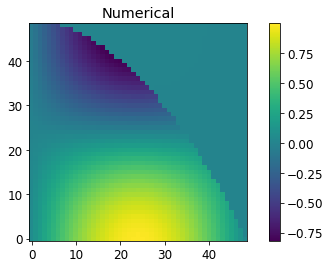

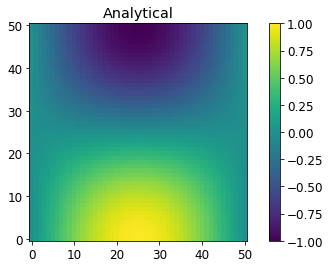

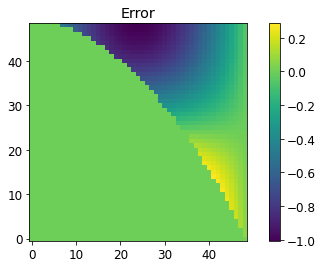

In [781]:
M = 50
h = 1/M


def hyper_bndry_func(x,y):
    return -np.sin(np.pi * x) * np.cos(np.pi * y)

def u_exact(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

def f(x, y):
    return np.pi**2 * (2) * np.sin(np.pi * x) * np.cos(np.pi * y) 

x = np.linspace(0, 1, M+1)
y = np.linspace(0, 1, M+1)
xx, yy = np.meshgrid(x, y)
fmat = f(xx, yy)[1:-1, 1:-1]
fvec = fmat.flatten()
U_exact = u_exact(xx, yy)


left = U_exact[:, 0]
top = np.zeros(M+1)
right = np.zeros(M+1)
bottom = U_exact[0, :]
g2 = normal_dirichlet([left, top, right, bottom], -1, -1)

domain_vec = bool2vec(bool_domain_gen(M))

hyper_function = hyper_f_fixer(fvec, domain_vec)

C = ndiag([1,-4,1], [-1,0,1], (M-1))
B = 1 * np.eye(M-1)
A = triblock_mod(C, B, M, domain_vec)

A, g2, boundary_indices = equation_fixer(A, g2, domain_vec, M, hyper_bndry_func, hyper_function)
G = g2.reshape((M-1,M-1))
U_vec = np.linalg.solve(A, -g2 - hyper_function*h**2)
U = U_vec.reshape((M-1, M-1))

im(U, 'Numerical')
im(U_exact, 'Analytical')
im(U_exact[1:-1,1:-1] - U, 'Error')


## Convergence plot at the boundary

M array:  [16 32 64]


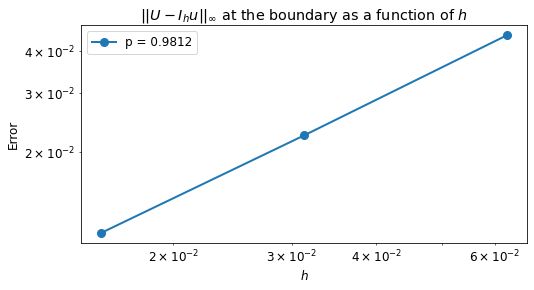

In [782]:
def hyper_bndry_func(x,y):
    return -np.sin(np.pi * x) * np.cos(np.pi * y)

def u_exact(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

def f(x, y):
    return np.pi**2 * (2) * np.sin(np.pi * x) * np.cos(np.pi * y) 

num_points = 3
Ms = 2**np.arange(4, 4+num_points) 
print("M array: ", Ms)
hs = 1 / Ms

errors = np.zeros(num_points)

for i in range(num_points):
    M = Ms[i]
    h = hs[i]
    x = np.linspace(0, 1, M+1)
    y = np.linspace(0, 1, M+1)
    xx, yy = np.meshgrid(x, y)
    fmat = f(xx, yy)[1:-1, 1:-1]
    fvec = fmat.flatten()
    U_exact = u_exact(xx, yy)


    left = U_exact[:, 0]
    top = np.zeros(M+1)
    right = np.zeros(M+1)
    bottom = U_exact[0, :]
    g2 = normal_dirichlet([left, top, right, bottom], -1, -1)

    domain_vec = bool2vec(bool_domain_gen(M))

    hyper_function = hyper_f_fixer(fvec, domain_vec)

    C = ndiag([1,-4,1], [-1,0,1], (M-1))
    B = 1 * np.eye(M-1)
    A = triblock_mod(C, B, M, domain_vec)

    A, g2, boundary_indices = equation_fixer(A, g2, domain_vec, M, hyper_bndry_func, hyper_function)
    
    U_vec = np.linalg.solve(A, -g2 - hyper_function*h**2)
    U = U_vec.reshape((M-1, M-1))

    boundary_bool = boundary_indices.reshape((M-1, M-1))
    analytical_boundary = U_exact[1:-1, 1:-1] * boundary_bool
    numerical_boundary = U * boundary_bool
    
    errors[i] = np.max(np.abs(analytical_boundary - numerical_boundary))

order = np.polyfit(np.log(hs),np.log(errors), 1)[0]

plt.loglog(hs, errors, '-o', label = 'p = {:.4f}'.format(order))
plt.xlabel(r'$h$')
plt.ylabel('Error')
plt.title(r'$||U-I_{h}u||_\infty$ at the boundary as a function of $h$')
plt.legend()
plt.show()

# Problem 2: Fattening the boundary

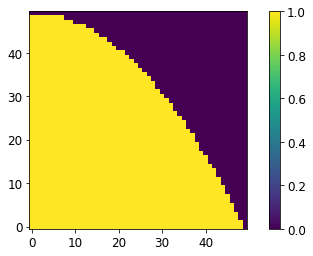

In [783]:
num_points = 49

def bool_domain_gen(num_points):
    x = np.linspace(0, 1, num_points+1)
    y = np.linspace(0, 1, num_points+1)
    x_g, y_g = np.meshgrid(x, np.sqrt(1-y))
    #y_g = y_g[::-1]
    bool_domain = x_g < y_g
    return bool_domain

bool_domain = bool_domain_gen(num_points)

im(bool_domain)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


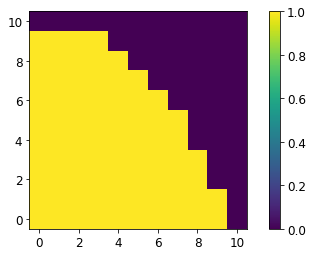

In [784]:
num_points = 10
x = np.linspace(0, 1, num_points+1)
y = np.linspace(0, 1, num_points+1)
print(x)

def bool_domain_gen_y(x, y, num_points):
    x_g, y_g = np.meshgrid(x, np.sqrt(1-y))
    #y_g = y_g[::-1]
    bool_domain = x_g < y_g
    return bool_domain

#
#  
#

bool_domain = bool_domain_gen_y(x, y, num_points)

im(bool_domain)

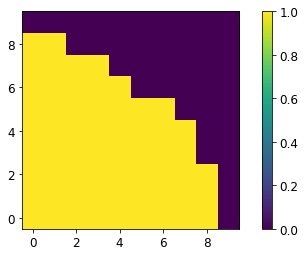

In [785]:
num_points = 10
x = np.linspace(0, 1, num_points)
y = np.linspace(0, 1, num_points)
#print(x)
def bool_domain_gen_x(x, y, num_points):
    x_g, y_g = np.meshgrid(x, 1-x**2)
    #y_g = y_g[::-1]
    bool_domain = x_g < y_g
    return bool_domain

bool_domain = bool_domain_gen_x(x, y, num_points)

im(bool_domain)

In [786]:
def domain2(dom_mx):
    vec = np.zeros(len(dom_mx[0,:]))
    for i in range(len(vec)):
        vec[i] = np.sum(dom_mx[i])
    vec = vec.astype(int)
    return vec

print(domain2(bool_domain))

[9 9 9 8 8 7 5 4 2 0]


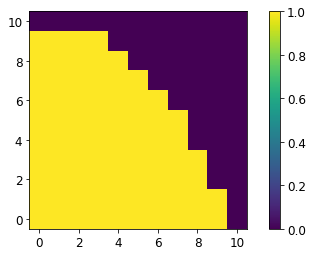

In [787]:
#
#
def projection_y(M): 

  solution_list_y = []
  boundary_point_y = []
#
  x = np.linspace(0,1,M+1)
  y = np.linspace(0,1,M+1)
#
  x_current = np.linspace(0,1,M)
  y_current = np.linspace(0,1,M)
#
  P = domain2(bool_domain_gen_y(x, y, M))
  for i in range(len(P)):
#    
# Need to evaluate point on the spare matrix    
#     
      r = Symbol('r')
#    
      if P[i] < M:  
        x_p = x[P[i]+1]
      else:
        x_p = 1
      y_p = y[i]
#
      solution = solve(x_p + r*(1-2*y_p) - 2*r**3, r)
#      
      y_1 = 1 - solution[0]**2
#      
      solution_list_y.append([solution[0], y_1])    
      boundary_point_y.append([P[i] + 1, i]) 
#
#
#
  return solution_list_y, boundary_point_y

def projection_x(M): 

  solution_list_x = []
  boundary_point_x = []
#
  x = np.linspace(0,1,M+1)
  y = np.linspace(0,1,M+1)
#
  x_current = np.linspace(0,1,M)
  y_current = np.linspace(0,1,M)
# 

#
  #P = domain2(bool_domain_gen(M))
  P = domain2(bool_domain_gen_x(x, y, M))
  for i in range(len(P)):
#    
# Need to evaluate point on the spare matrix    
#     
      if P[i] < M:
        r = Symbol('r')
  #      
        
        y_p = y[P[i]+1]
  #
        
      else:
        r = Symbol('r')
        y_p = 1

      x_p = x[i]
      solution = solve(x_p + r*(1-2*y_p) - 2*r**3, r)
  #      
      y_1 = 1 - solution[0]**2
#      
      solution_list_x.append(([solution[0],y_1]))    
      boundary_point_x.append([i, P[i]+1]) 
#
  return solution_list_x, boundary_point_x
#
# Test
M = 10
bool_domain = bool_domain_gen(M)
im(bool_domain)




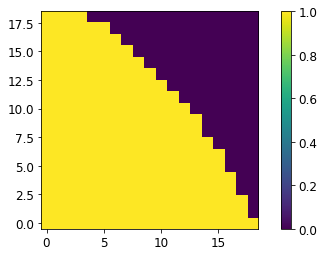

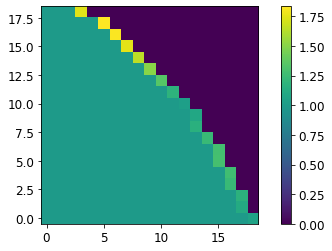

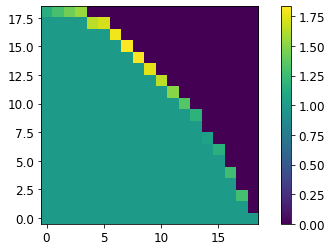

In [788]:
def normal_dirichlet(boundaries, alpha = 1, beta = 1):
    """ Create a one-dimensional vector for Dirichlet conditions. Uses natural ordering.

    Args:
        G (array(4 x M-1)): Matrix with row vectors corresponding respectively to boundary at x = x0, y = y0, x = xend, y = yend
        alpha, beta (floats): Constants as defined in text. Optional arguments. 

    Returns:
        g (array(M-1)^2): One dimensional array meant for use in linear system, using natural ordering
    """
    l, t, r, b = boundaries
    M = l.shape[0] - 1         # l is M+1
    G = np.zeros((M-1, M-1))
    G[0, :] += beta * b[1:M]
    G[-1, :] += beta * t[1:M]
    G[:, 0] += alpha * l[1:M]
    G[:, -1] += alpha * r[1:M]

    return G.flatten()
#
#   New boundrady condtions
#

def f(x, y):
    a = 0
    return np.sin(np.pi * x) * np.cos(np.pi * y)
    

def normal_dirichlet_paranolic_y(M, f):
#    
#   Written by Jan Haakon Melka Trabski, 2023
#
    B = (projection_y(M))[1]# This is the boundary of Y
    D = (projection_y(M))[0] 
#
    G = np.zeros((M-1, M-1))
# 
    j = 0
#
    for i in B:
        if i[0] < M+2 and i[1] < M-1:
            G[int(i[1]-1), int(i[0])-3] = f(float(D[j][0]), float(D[j][1]))
            j += 1
        elif i[0] == M+2:
            G[int(i[1])-1, int(i[0])-3] = f(float(D[j][0]), float(D[j][1]))
            j+=1
        elif i[1] == M-1:
            G[int(i[1])-1, int(i[0])-3] = f(float(D[j][0]), float(D[j][1]))
            j+=1
#   
    return (G) 
#
#
def normal_dirichlet_paranolic_x(M, f):
#    
    A = (projection_x(M)[1])# This is the boundary of X This is wrong!     
    C = (projection_x(M))[0] 
#    
    G = np.zeros((M-1, M-1))
# 
    j = 0
#
    for i in A:
#       
        if i[0] < M-1 and i[1] < M+2:
            G[i[1]-3][i[0]-1] = f(float(C[j][0]),float(C[j][1]))
            j += 1    
#        
    return (G) 

#
# Testing
# 
M = 20
#
B = (projection_y(M)[1])# This is the boundary of Y
#
A = (projection_y(M)[1])# This is the boundary of X 
#
#print(B, "Y")
#print(A, "X")

l = np.arange(M+1)
t = np.zeros(M+1)
r = np.zeros(M+1)
b = np.arange(M+1)

g1 = (normal_dirichlet([l, t, r, b], 1, 1))

gy = normal_dirichlet_paranolic_y(M, f)
gx = normal_dirichlet_paranolic_x(M, f)


#print(g3)
#print(g4)

bool_domain = bool_domain_gen(M)[1:-1,1:-1]
im(bool_domain)
im(bool_domain + np.abs(gy))
im(bool_domain + np.abs(gx))


ah:3


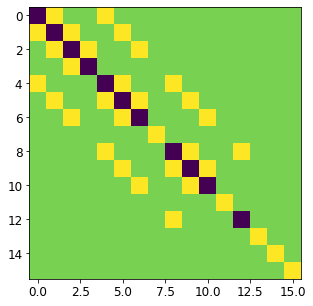

In [789]:
def ndiag(consts, offsets, N):
    """Generate a matrix with arbitrary number of constant diagonals, 0 elsewhere

    Args:
        consts (list of floats):    list containing floats on diagonal
        offsets (list of ints):     list of offsets. Corresponds to the consts list
        N (int):                    length of array

    Returns:
        A (N x N matrix):           matrix with diagonals as specified
    """
    diags = []
    for i in range(len(consts)):
        diags.append(consts[i] * np.ones(N - np.abs(offsets[i])))

    A = np.zeros((N,N))
    for i in range(len(diags)):
        A += np.diag(diags[i], offsets[i])
    return A

def triblock_mod(C, B, M, domain_vec):
    A = np.kron(np.eye(M-1), C)
    A += np.kron(ndiag([1,1], [-1, 1], M-1), B)
    if np.size(A) != len(domain_vec)**4:
        print("np.size(A) != len(domain_vec)**4")
        print(np.size(A))
        print(len(domain_vec)**4)

    for i in range(len(domain_vec)):
        A[(i*(len(domain_vec))+domain_vec[i]):(i+1)*(len(domain_vec)), :] = 0
    
    for i in range(len(domain_vec)**2):
        if A[i,i] == 0:
            A[i,i] = 1
    for i in range(len(domain_vec)**2):
        if A[i,i] != 1:
            if A[i+1,i+1] == 1:
                A[i,i+1] = 0
            if i < len(domain_vec)**2 - len(domain_vec):
                if A[i+len(domain_vec),i+len(domain_vec)] == 1:
                    A[i, i+len(domain_vec)] = 0
        
    return A

# Testing
M = 5
C = ndiag([1,-4,1], [-1,0,1], (M-1))
B = 1 * np.eye(M-1)


A = triblock_mod(C, B, M, [4,3,3,1])



print("ah:"+str(len([3,2,1])))
plt.figure(0, figsize = (5,5))
plt.imshow(A)
plt.show()

In [790]:
def equation_fixer(A, g2, domain_vec, M, b_function):
    h = 1/M
    if np.size(A) != len(domain_vec)**4:
        print("np.size(A) != len(domain_vec)**4")
    if np.size(A) != len(g2)**2:
        print("np.size(A) != len(g2)**2")
    for i in range(len(domain_vec)**2-1):
        if A[i,i] != 1:
            if A[i,i+1] == 0 or A[i, i+len(domain_vec)] == 0:
                x_p = (i%len(domain_vec)+1)*h
                y_p = (i//len(domain_vec)+1)*h
                eta = (1 - x_p**2 - y_p)/h
                xsi = (np.sqrt(1-y_p) - x_p)/h
                
                A[i,i] = -(-2/xsi - 2/eta)
                if i > 0:
                    A[i,i-1] *=  2 / ((1+xsi))
                A[i, i+1] *= ( 2 / (xsi*(1+xsi)) )
                if i > len(domain_vec):
                    A[i, i-len(domain_vec)] =  2 / ((1+eta))
                if i < len(domain_vec)**2 - len(domain_vec):
                    A[i, i+len(domain_vec)] *=  ( 2 / (eta*(1+eta)) )
        
                if A[i,i+1] == 0 and (i%len(domain_vec)+1) <len(domain_vec)+1:
                    g2[i] += ( 2 / (xsi*(1+xsi)) ) * b_function(x_p + xsi, y_p)
                if i < len(domain_vec)**2 - len(domain_vec):
                    if A[i, i+len(domain_vec)] == 0:
                        g2[i] += ( 2 / (eta*(1+eta)) ) * b_function(x_p, y_p + eta)
                
    return A, g2




"""left = np.arange(M+1)
top = np.zeros(M+1)
right = np.zeros(M+1)
bottom = np.arange(M+1)


g2 = normal_dirichlet([left, top, right, bottom], 1, 1)

def bndry_func(x,y):
    return x+y

A, g2 = equation_fixer(A, g2, [4,3,3,1], M, bndry_func)
plt.figure(0, figsize = (5,5))
for i in range(int(np.sqrt(np.size(A)))):
    for j in range(int(np.sqrt(np.size(A)))):
        if A[i,j] == 0:
            A[i,j] = True
        else:
            A[i,j] = False
plt.imshow(A)
plt.show()"""

'left = np.arange(M+1)\ntop = np.zeros(M+1)\nright = np.zeros(M+1)\nbottom = np.arange(M+1)\n\n\ng2 = normal_dirichlet([left, top, right, bottom], 1, 1)\n\ndef bndry_func(x,y):\n    return x+y\n\nA, g2 = equation_fixer(A, g2, [4,3,3,1], M, bndry_func)\nplt.figure(0, figsize = (5,5))\nfor i in range(int(np.sqrt(np.size(A)))):\n    for j in range(int(np.sqrt(np.size(A)))):\n        if A[i,j] == 0:\n            A[i,j] = True\n        else:\n            A[i,j] = False\nplt.imshow(A)\nplt.show()'

In [791]:
def hyper_f_fixer(function_vec, domain_vec):
    mod_f_vec = function_vec
    for i in range(len(function_vec)):
        if function_vec[i] > domain_vec[i//len(domain_vec)]:
            mod_f_vec[i] = 0
    return mod_f_vec

50


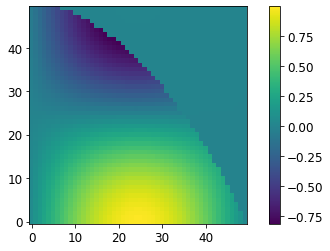

In [792]:
M = 51
h = 1/M
a = 0.1

left = np.ones(M+1)
left = np.arange(M+1)
left = np.sin(left*5)
top = np.zeros(M+1)
right = np.zeros(M+1)
bottom = np.ones(M+1)
#g2 = normal_dirichlet([left, top, right, bottom], a, 1)



def hyper_bndry_func(x,y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

C = ndiag([1,-4,1], [-1,0,1], (M-1))
B = 1 * np.eye(M-1)


def u_exact(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

"""
def f(x, y):
    return np.pi**2 * ((a+1+r**2) * np.sin(np.pi * x) * np.cos(np.pi * y) + 2*r * np.cos(np.pi * x) * np.sin(np.pi * y))
"""

def f(x, y):
    return np.pi**2 * (2) * np.sin(np.pi * x) * np.cos(np.pi * y) 


x = np.linspace(0, 1, M+1)
y = np.linspace(0, 1, M+1)
xx, yy = np.meshgrid(x, y)
fmat = f(xx, yy)[1:-1, 1:-1]
fvec = fmat.flatten()
U_exact = u_exact(xx, yy)
b = U_exact[0, :]
t = np.zeros(M+1)
l = U_exact[:, 0]
r = np.zeros(M+1)
boundaries = [l,t,r,b]

g2 = normal_dirichlet(boundaries, 1, 1)

#print(np.size(g2))

g3 = normal_dirichlet_paranolic_y(M, hyper_bndry_func).flatten()
g4 = normal_dirichlet_paranolic_x(M, hyper_bndry_func).flatten()
#A  = (np.flip(g2.reshape((M-1,M-1)), 0))

g = (g3+g4+g2)
"""im(g.reshape((M-1, M-1)))
im(g3.reshape((M-1,M-1)))
im(g4.reshape((M-1,M-1)))"""

omega = domain2(bool_domain_gen(M)[1:-1,1:-1])
print(len(omega))

#hyper_funtion = hyper_f_fixer(np.ones((M-1)**2), omega)

A = triblock_mod(C, B, M, omega)

#A, g2 = equation_fixer(A, g2, omega, M, hyper_bndry_func)

U_vec = np.linalg.solve(A, -g - fvec*h**2)
U = U_vec.reshape((M-1, M-1))

im(U)
bool_domain=bool_domain_gen(M)[1:-1,1:-1]

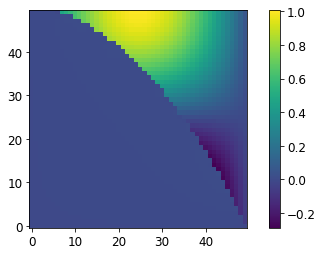

In [793]:
im(U-U_exact[1:-1,1:-1])

### Convergence plot

M array:  [16 32 64]
(225, 225)
(225,)
(225,)
(961, 961)
(961,)
(961,)
(3969, 3969)
(3969,)
(3969,)


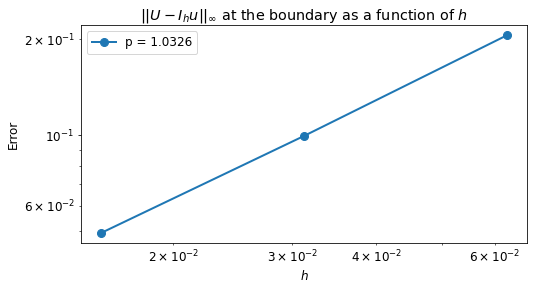

In [794]:
def hyper_bndry_func(x,y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

def u_exact(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

def f(x, y):
    return np.pi**2 * (2) * np.sin(np.pi * x) * np.cos(np.pi * y) 

num_points = 3
Ms = 2**np.arange(4, 4+num_points) 
print("M array: ", Ms)
hs = 1 / Ms

errors = np.zeros(num_points)

for i in range(num_points):
    M = Ms[i]
    h = hs[i]
    x = np.linspace(0, 1, M+1)
    y = np.linspace(0, 1, M+1)
    xx, yy = np.meshgrid(x, y)
    fmat = f(xx, yy)[1:-1, 1:-1]
    fvec = fmat.flatten()
    U_exact = u_exact(xx, yy)
    b = U_exact[0, :]
    t = np.zeros(M+1)
    l = U_exact[:, 0]
    r = np.zeros(M+1)
    boundaries = [l,t,r,b]

    g2 = normal_dirichlet(boundaries, 1, 1)

    g3 = normal_dirichlet_paranolic_y(M, hyper_bndry_func).flatten()
    g4 = normal_dirichlet_paranolic_x(M, hyper_bndry_func).flatten()

    g = (g3+g4+g2)

    bool_domain = bool_domain_gen(M)[1:-1,1:-1]
    omega = domain2(bool_domain)
    
    C = ndiag([1,-4,1], [-1,0,1], (M-1))
    B = 1 * np.eye(M-1)

    A = triblock_mod(C, B, M, omega)
    print(A.shape)
    print(g.shape)
    print(fvec.shape)
    U_vec = np.linalg.solve(A, -g - fvec*h**2)
    U = U_vec.reshape((M-1, M-1))

    boundary_bool = bool_domain + g3.reshape((M-1,M-1)) + g4.reshape((M-1, M-1))
    boundary_bool[boundary_bool == 1] = 0
    boundary_bool[boundary_bool != 0] = 1

    boundary_bool = boundary_bool.reshape((M-1, M-1))
    analytical_boundary = U_exact[1:-1, 1:-1] * boundary_bool
    numerical_boundary = U * boundary_bool
    
    errors[i] = np.max(np.abs(analytical_boundary - numerical_boundary))

order = np.polyfit(np.log(hs),np.log(errors), 1)[0]

plt.loglog(hs, errors, '-o', label = 'p = {:.4f}'.format(order))
plt.xlabel(r'$h$')
plt.ylabel('Error')
plt.title(r'$||U-I_{h}u||_\infty$ at the boundary as a function of $h$')
plt.legend()
plt.show()